# Pymaceuticals Inc.
---

# Analysis 

Pymaceuticals involving mice and drug regimens:

Sex Distribution: The study involved 249 mice, with a nearly even distribution of sexes. This balance in gender representation is essential to ensure that the results aren't skewed due to gender differences.

Drug Regimens: At least nine different drug regimens, including a placebo, were tested. Ramicane and Capomulin appear to be the most effective in reducing tumor growth, as they have the lowest mean, median, variance, and standard deviation. Additionally, they were tested in a significant number of essays (timepoints), which suggests their effectiveness is well-documented.

Tumor Growth for Capomulin: It seems that the tumor growth response to Capomulin varied among mice. Some mice experienced an initial increase in tumor volume, followed by a decrease. Others had a slight increase, followed by a constant decrease. These variations in response may be due to individual differences or other factors not mentioned in the analysis.

Correlation and Regression: There is a strong positive relationship (correlation of 0.84) between tumor volume and mouse weight. This suggests that as the weight of the mouse increases, the tumor volume also tends to increase. This relationship can be explored further using regression analysis to predict tumor volume based on mouse weight.

Overall, your analysis provides a good overview of the data and its key findings, particularly in terms of the effectiveness of drug regimens and the relationship between tumor volume and mouse weight


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [2]:
# Read the mouse data results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Read the study results  data results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#Count total number of mice 
len(mouse_metadata["Mouse ID"].value_counts())

249

In [5]:
#Count total number of mice with unique 
mice_number= mouse_metadata["Mouse ID"].nunique()
total_micedf = pd.DataFrame({"Total Mice":[mice_number]})
total_micedf

,Total Mice
0,249


In [6]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata,study_results, on ="Mouse ID")
# Display the data table for preview
mouse_study.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
# Add count to know total number of lines and see if drop.duplicate worked. 
mouse_study.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
show_duplicates = mouse_study[mouse_study.duplicated(["Mouse ID", "Timepoint"])]
show_duplicates.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
Name: count, dtype: int64

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_study.loc[mouse_study['Mouse ID'] == "g989",:]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study.drop_duplicates(subset = ["Mouse ID","Timepoint"])

#display result
clean_mouse_study.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_groups = clean_mouse_study.groupby(["Drug Regimen"])

In [12]:
drug_groups = clean_mouse_study.groupby(["Drug Regimen"])
# Calculate mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Get average/mean of tumor volume
Average_tv = round(drug_groups["Tumor Volume (mm3)"].mean(),2)

# Get the median of tumor volume
Median_tv = round(drug_groups["Tumor Volume (mm3)"].median(),2)

# Get the variance of tumor volume
Variance_tv = round(drug_groups["Tumor Volume (mm3)"].var(),2)

#Get the standard deviation of tumor volume
Sdev_tv = round(drug_groups["Tumor Volume (mm3)"].std(),2)

#Get the SEM of tumor volume
SEM_tv = round(drug_groups["Tumor Volume (mm3)"].sem(),2)

#Create a new dataframe with new information

Drug_summarydf_a =pd.DataFrame({
      "Mean Tumor Volume":Average_tv, 
       "Median Tumor Volume": Median_tv, 
       "Variance Tumor Volume": Variance_tv, 
       "Standard Deviation Tumor Volume": Sdev_tv,
      "SEM Tumor Volume":SEM_tv
                                 
    })

Drug_summarydf_a

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

Drug_summarydf_b = round(drug_groups["Tumor Volume (mm3)"].agg(["mean", "median","var","std","sem"]),2)


# Assemble the resulting series into a single summary dataframe.

#Change names of dataframe columns
Drug_summarydf_b = Drug_summarydf_b.rename(columns={
    "mean": "Mean Tumor Volume",
     "median": "Median Tumor Volume",
    "var": "Variance Tumor Volume",
     "std":"Standard Dev Tumor Volume ", 
    "sem":"SM Tumor Volume"
})

Drug_summarydf_b

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Dev Tumor Volume,SM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


# Bar and Pie Charts

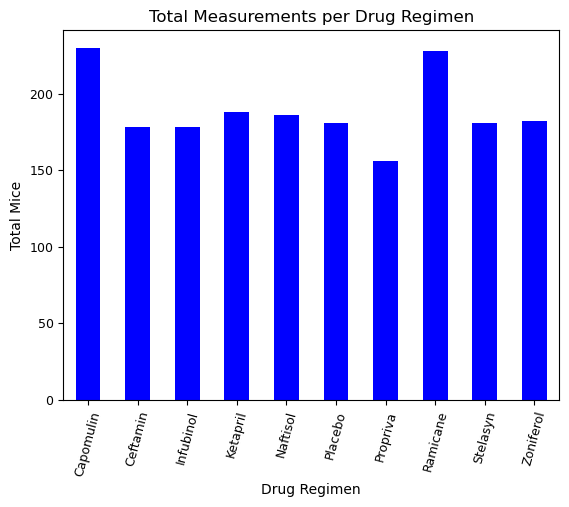

In [14]:
#calculated drug_regimen ct
drug_regimen_ct = drug_groups["Mouse ID"].count()

# Create the bar plot
drug_pdplot = drug_regimen_ct.plot.bar(rot=75, title="Total Measurements per Drug Regimen", fontsize=9, color="blue")
drug_pdplot.set_xlabel("Drug Regimen")
drug_pdplot.set_ylabel("Total Mice")

# Display the plot
plt.show()


In [15]:
# Display drug regimen
drug_regimen_ct.head(9)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Name: Mouse ID, dtype: int64

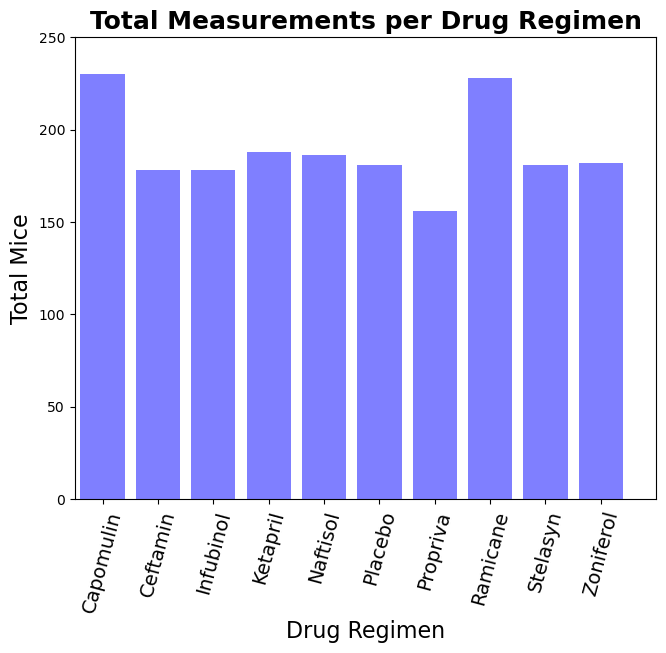

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot
# Set x axis and tick locations
x_axis = np.arange(len(drug_regimen_ct))
y_axis = drug_regimen_ct

# Make ticks
tx = list(drug_regimen_ct.index.values)
tick_locations = [value for value in x_axis]

# Create a figure and axis
plt.figure(figsize=(7.5, 6))
plt.bar(x_axis, y_axis, color='blue', alpha=0.5, align="center")
plt.xticks(tick_locations, tx, rotation=75, fontsize=14)

# Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, 250)

# Set a Title and labels
plt.title("Total Measurements per Drug Regimen", fontsize=18, fontweight='bold')
plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("Total Mice", fontsize=16)

# Display the plot
plt.show()


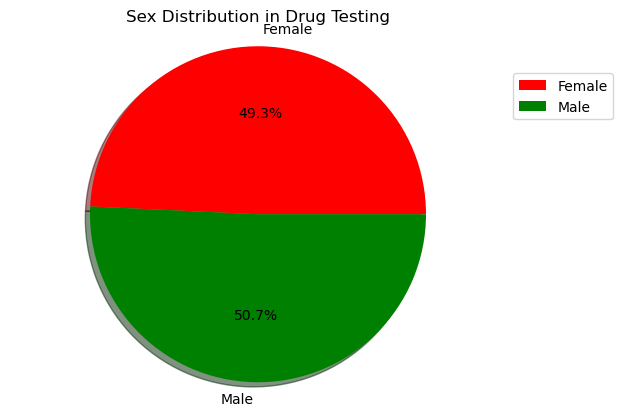

In [17]:
# Separate female and male mice
mouse_sex = clean_mouse_study.groupby(["Sex"]).count()

# Create a pie chart based on the count of mice by sex
mice_piepd = mouse_sex.plot(kind="pie",y='Mouse ID',title="Sex Distribution in Drug Testing",colors=["red", "green"],autopct="%.1f%%",shadow=True,startangle=360,)

# Remove the y-label
mice_piepd.set_ylabel("")

# Adjust the legend position for better visibility
mice_piepd.legend(
    loc='upper left',
    frameon=True,
    bbox_to_anchor=(1.0, 0.9),
)

# Display the pie chart
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


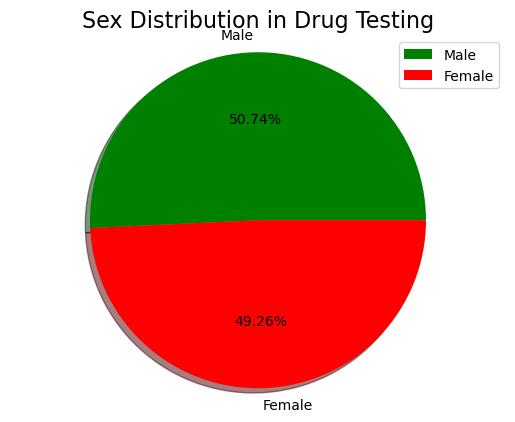

In [18]:
mice_sex = clean_mouse_study["Sex"].value_counts()

# Create variables to use in the pie chart
explode = (0, 0)
colors = ["green","red"]  # Change the color of "Male" to green
labels = list(mice_sex.index)

# Create a pie chart using pyplot
plt.pie(mice_sex, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=360)

# Set the title and legend
plt.title("Sex Distribution in Drug Testing", fontsize=16)
plt.legend(labels, loc='upper right', frameon=True, bbox_to_anchor=(1, 1))

# Ensure the pie chart is a perfect circle
plt.axis("equal")

# Display the pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint=clean_mouse_study.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [20]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tx_df = pd.merge(max_timepoint , clean_mouse_study, on=(["Mouse ID","Timepoint"]))
tx_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [21]:
# Put treatments into a list for loop (and later for plot labels)
#Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes for treatment in treatments: 
for treatment in treatments:
    tx_regimen = tx_df.loc[tx_df["Drug Regimen"] == treatment]
    tumor_vol= tx_regimen['Tumor Volume (mm3)']
    
#append tumor data to new list 
    tumor_vol_data.append(tumor_vol)

In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3
    
#Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

#Print values 
print(f"For {treatments[0]} values below {lower_bound0} and above {upper_bound0} could be outliers")
print(f"For {treatments[1]} values below {lower_bound1} and above {upper_bound1} could be outliers")
print(f"For {treatments[2]} values below {lower_bound2} and above {upper_bound2} could be outliers")
print(f"For {treatments[3]} values below {lower_bound3} and above {upper_bound3} could be outliers")

For Capomulin values below 20.70456164999999 and above 51.83201549 could be outliers
For Ramicane values below 17.912664470000003 and above 54.30681135 could be outliers
For Infubinol values below 36.83290494999999 and above 82.74144559000001 could be outliers
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 could be outliers


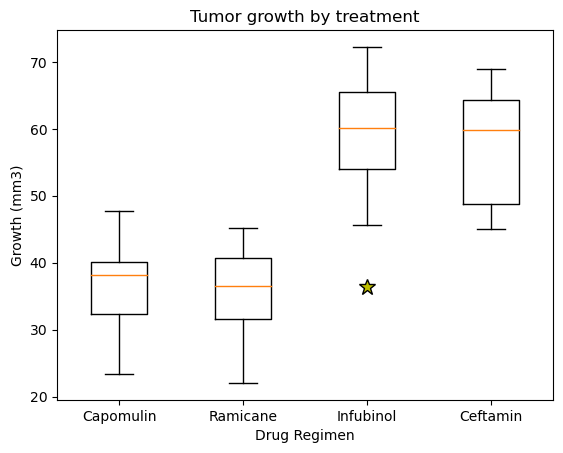

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = dict(marker='*', markerfacecolor='y', markersize=12,
                  linestyle='none')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor growth by treatment')
ax1.set_ylabel('Growth (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_data, flierprops = data_to_plot, labels = treatments)
plt.show()

## Line and Scatter Plots

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Find the mouse treated with Capomulin 
# list of mice treated with Capomulin 
cap_mice = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin"]
cap_mice.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
Name: count, dtype: int64

In [25]:
#Chose mice l509 
Mouse_l509 = clean_mouse_study.loc[clean_mouse_study["Mouse ID"] == "l509"]

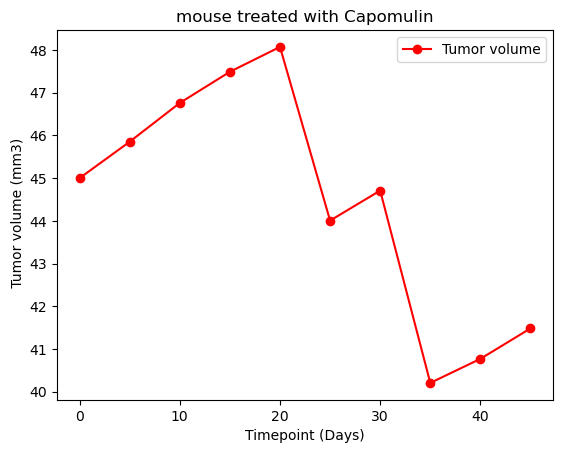

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Make variables to plot 
x_axis = Mouse_l509["Timepoint"]
tumor_y = Mouse_l509["Tumor Volume (mm3)"]


# Plot our line that will be used to 
plt.plot(x_axis, tumor_y, color="red", label="Tumor volume",marker="o",)

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

#Give titles and labels to graph
plt.title( "mouse treated with Capomulin")
plt.xlabel("Timepoint (Days)")
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 10))
plt.ylabel(" Tumor volume (mm3)")

# Print our chart to the screen
plt.show()

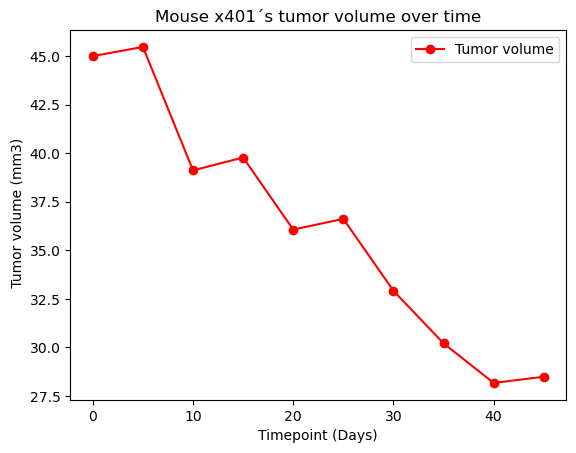

In [27]:
# Chose and extra mouse x401
Mouse_x = clean_mouse_study.loc[clean_mouse_study["Mouse ID"] == "x401"]
tumorx_y = Mouse_x["Tumor Volume (mm3)"]
timex_x = Mouse_x["Timepoint"]

# Plot our line that will be used to 
plt.plot(timex_x, tumorx_y, color="red", label="Tumor volume",marker="o")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

#Give titles and labels to graph
plt.title( "Mouse x401´s tumor volume over time")
plt.xlabel("Timepoint (Days)")
plt.xticks(np.arange(min(timex_x), max(timex_x)+1, 10))
plt.ylabel(" Tumor volume (mm3)")

# Print our chart to the screen
plt.show()


In [28]:
# Group the data by "Mouse ID" and calculate the mean of "Tumor Volume (mm3)"
capomulin_mean = cap_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Display the first few rows of the result
print(capomulin_mean.head())


Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
Name: Tumor Volume (mm3), dtype: float64


In [29]:
#calculated capomulin_mean
avg_tumor_vol = capomulin_mean  # This gives you the average tumor volume
avg_weight = cap_mice.groupby("Mouse ID")["Weight (g)"].mean() 


Text(0, 0.5, 'Tumor volume (mm3)')

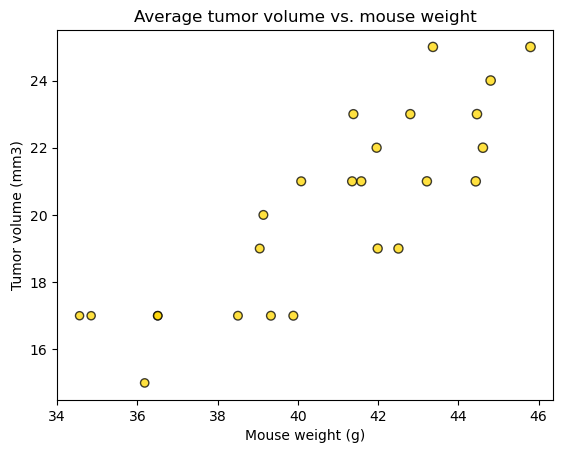

In [30]:
#Create scatterplot 
plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="gold", edgecolors="black",
            s=avg_tumor_vol, alpha=0.75)
#Add title and labels to scatter plot 
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84
The r-squared value is: 0.7088568047708723
y = 0.95x + 21.55


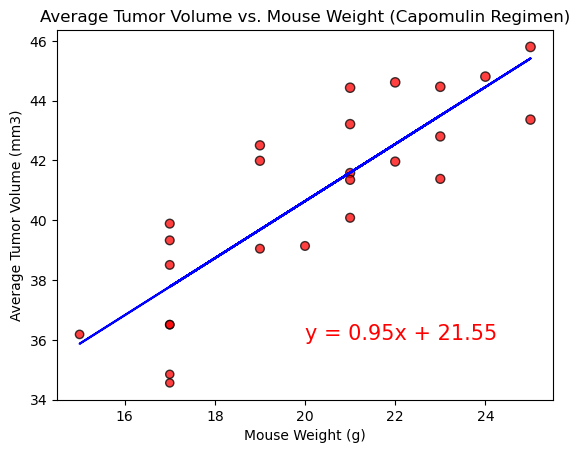

<Figure size 640x480 with 0 Axes>

In [31]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient
correlation = st.pearsonr(avg_weight, avg_tumor_vol)

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_weight, avg_tumor_vol)
regress_values = avg_weight * slope + intercept

# Create a scatter plot
plt.scatter(avg_weight, avg_tumor_vol, marker="o", facecolors="red", edgecolors="black",
            s=avg_tumor_vol, alpha=0.75)
plt.plot(avg_weight, regress_values, "b-")

# Add title and labels to the scatter plot
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (20, 36), fontsize=15, color="red")

# Display correlation coefficient and r-squared value
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0], 2)}")
print(f"The r-squared value is: {rvalue**2}")
print(line_eq)

# Show the plot
plt.show()

plt.savefig("output.png", bbox_inches="tight")